# **Interactalytics: Decoding Facebook Engagement with Predictive Intelligence**


---

# **BLUF**

We looked at MSE, MAE, and R-squared to conduct an analysis of each model. We used the multiple linear regression, lasso regression, ridge regression, elasticnet regression, KNN regression, SVR, Decision Trees, Multilayer Perceptron, Random Forests, XGBoost, AdaBoost, and Stacked Ensemble models to predict the total number of interactions.

The overall best model is the Stacked Ensemble model with an R-squared of 87%. The multiple linear regression model also does very well with an R-squared of 85%. These two models accurately predict the total number of interactions including likes, shares, and comments.


# **Business Problem**

Social media engagement serves as the lifeblood for digital marketers and content creators, with Facebook interactions being a primary measure of success. The landscape of social media is highly competitive, and the ability to predict how users will engage with content can provide a significant edge. Understanding the drivers of likes, shares, and comments is critical for any business looking to amplify its online presence and foster a strong connection with its audience.

### **The Challenge**
In the digital realm, Facebook's algorithmic timelines present a challenge in ensuring content reaches the intended audience and resonates to drive engagement. Marketers and businesses often operate on instinct and trial-and-error, lacking precise tools to forecast the performance of their posts. The goal is to move from a reactive to a predictive strategy, enabling proactive content optimization.

### **Vision**
EngageMax aims to utilize a dataset rich with insights on post interactions to build a sophisticated machine learning model. This model will predict user engagement levels based on factors such as post type, timing, and whether the content is promoted through paid channels. This initiative will help refine marketing strategies, increase the efficacy of content, and enhance audience engagement.

### **Business Objectives**
* Develop an AI-Enabled Predictive Model: Employ machine learning to dissect and predict Facebook post interactions, aiding content creators in understanding what drives user engagement.
* Strategic Content Deployment: Use predictive insights to craft content that resonates with the audience, maximizing reach and interaction.
* Optimize Ad Spend: Improve the return on investment for paid promotions by predicting which posts will benefit most from paid amplification.
* Dynamic Engagement Strategies: Adapt strategies in real-time based on predictive analytics to maintain a competitive edge in a rapidly evolving digital marketplace.

## **Metrics**

Choose your own metrics

#**Libraries**

In [2]:
#!pip install -q pycaret autoviz --upgrade psynlig
#from pycaret.classification import *
#!pip install keras==2.12.0 # You will have to restart the runtime after this install

In [3]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.808. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from datetime import datetime
import scipy.stats as ss
from scipy.stats.mstats import winsorize

In [5]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [6]:
# XGBoost & LightGBM
!pip install lightgbm
from xgboost import XGBRegressor
import lightgbm as lgb

In [7]:
# Wordcloud & nltk
#!pip install wordcloud
#import nltk
#from nltk import word_tokenize, sent_tokenize
#from nltk.corpus import stopwords
#from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
##from wordcloud import WordCloud, STOPWORDS
#from textblob import TextBlob
#from wordcloud import WordCloud, STOPWORDS

In [8]:
# Keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.metrics import mean_squared_error

### **Data Overview**
The dataset provides various metrics that could influence the level of interaction a Facebook post may receive:

* Page Total Likes: The total number of likes on the page when the post was made.
* Type: The type of content shared (e.g., Photo, Status).
* Category: The category of the post (e.g., 1 for direct, 2 for indirect).
* Post Month/Weekday/Hour: Timing of the post, potentially affecting visibility.
* Paid: Indicates if the post was promoted with paid advertising.
* Lifetime Post Total Reach: The total number of people who saw the post.
* Lifetime Post Total Impressions: The number of times the post was displayed.
* Lifetime Engaged Users: Users who have clicked anywhere on the post.
* Lifetime Post Consumers: People who have clicked on the post content.
* Lifetime Post Consumptions: The total number of post clicks.
* Lifetime Impressions by People Who Have Liked Your Page: Impressions on people who liked the page.
* Lifetime Reach by People Who Like Your Page: Reach within people who liked the page.
* Lifetime People Who Have Liked Your Page and Engaged with Your Post: The subset of people who liked the page and engaged with this particular post.
* Total Interactions: The total number of interactions including likes, shares, and comments. [**Target**]

##**Importing data**

In [9]:
# Read
# File: https://drive.google.com/file/d/1ThnSViYnKtk3THJ0EvXwLAy2Ky9jilV9/view?usp=sharing

# Direct download link
url = 'https://drive.google.com/uc?export=download&id=1-FQHqH6XwxvNd9oUeUUgEx2xen8omSUl'

# Read in the dataset
df = pd.read_csv(url, header=0)


In [10]:
df

Page total likes   Type   Category  Post Month  Post Weekday  Post Hour  \
0         139441        Photo      2         12            4           3       
1         139441       Status      2         12            3          10       
2         139441        Photo      3         12            3           3       
3         139441        Photo      2         12            2          10       
4         139441        Photo      2         12            2           3       
5         139441       Status      2         12            1           9       
6         139441        Photo      3         12            1           3       
7         139441        Photo      3         12            7           9       
8         139441       Status      2         12            7           3       
9         139441        Photo      3         12            6          10       
10        139441       Status      2         12            5          10       
11        139441        Photo      2         12            5          10       
12        139441        Photo      2         12            5          10       
13        139441        Photo      2         12            5           3       
14        138414        Photo      2         12            4           5       
15        138414       Status      2         12            3          10       
16        138414        Photo      3         12            3           3       
17        138414        Photo      1         12            2          12       
18        138414       Status      3         12            2           3       
19        138414        Photo      3         12            1          11       
20        138414        Photo      2         12            1           3       
21        138414        Photo      1         12            7          10       
22        138414         Link      1         12            7          10       
23        138414        Photo      3         12            7           3       
24        138414       Status      2         12            6          10       
25        138458       Status      2         12            6           3       
26        138458       Status      2         12            5          11       
27        138458        Photo      3         12            5           3       
28        138895        Photo      2         12            5           3       
29        138895        Video      1         12            4          11       
30        138895        Photo      2         12            4           2       
31        138895        Photo      2         12            3          10       
32        138895        Photo      3         12            3           3       
33        138895        Photo      3         12            2           9       
34        138895        Photo      1         12            2           3       
35        138895        Photo      2         12            1          11       
36        138895        Photo      3         12            1           3       
37        138895        Photo      1         12            7          10       
38        138895       Status      2         12            7           9       
39        138895        Photo      1         12            7           3       
40        138895       Status      2         12            6          11       
41        138895         Link      1         12            6           3       
42        138353        Photo      1         12            5          10       
43        138353         Link      1         12            5           3       
44        138353        Photo      1         12            4          11       
45        138353         Link      1         12            4           3       
46        138353       Status      1         12            3          11       
47        138353         Link      1         12            3           2       
48        138353        Photo      1         12            2          11       
49   

#**EDA**

In [11]:
# Show dataframe
df

Page total likes   Type   Category  Post Month  Post Weekday  Post Hour  \
0         139441        Photo      2         12            4           3       
1         139441       Status      2         12            3          10       
2         139441        Photo      3         12            3           3       
3         139441        Photo      2         12            2          10       
4         139441        Photo      2         12            2           3       
5         139441       Status      2         12            1           9       
6         139441        Photo      3         12            1           3       
7         139441        Photo      3         12            7           9       
8         139441       Status      2         12            7           3       
9         139441        Photo      3         12            6          10       
10        139441       Status      2         12            5          10       
11        139441        Photo      2         12            5          10       
12        139441        Photo      2         12            5          10       
13        139441        Photo      2         12            5           3       
14        138414        Photo      2         12            4           5       
15        138414       Status      2         12            3          10       
16        138414        Photo      3         12            3           3       
17        138414        Photo      1         12            2          12       
18        138414       Status      3         12            2           3       
19        138414        Photo      3         12            1          11       
20        138414        Photo      2         12            1           3       
21        138414        Photo      1         12            7          10       
22        138414         Link      1         12            7          10       
23        138414        Photo      3         12            7           3       
24        138414       Status      2         12            6          10       
25        138458       Status      2         12            6           3       
26        138458       Status      2         12            5          11       
27        138458        Photo      3         12            5           3       
28        138895        Photo      2         12            5           3       
29        138895        Video      1         12            4          11       
30        138895        Photo      2         12            4           2       
31        138895        Photo      2         12            3          10       
32        138895        Photo      3         12            3           3       
33        138895        Photo      3         12            2           9       
34        138895        Photo      1         12            2           3       
35        138895        Photo      2         12            1          11       
36        138895        Photo      3         12            1           3       
37        138895        Photo      1         12            7          10       
38        138895       Status      2         12            7           9       
39        138895        Photo      1         12            7           3       
40        138895       Status      2         12            6          11       
41        138895         Link      1         12            6           3       
42        138353        Photo      1         12            5          10       
43        138353         Link      1         12            5           3       
44        138353        Photo      1         12            4          11       
45        138353         Link      1         12            4           3       
46        138353       Status      1         12            3          11       
47        138353         Link      1         12            3           2       
48        138353        Photo      1         12            2          11       
49   

In [12]:
# Shape
df.shape

(500, 16)

In [13]:
# Checking missing values
print('Number of missing Values by Feature\n',df.isnull().sum())
columns_with_NaNs = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    columns_with_NaNs.append(col)
print('Columns with NaNs:',columns_with_NaNs)

# NaN imputation using the mode
df['Paid'] = df['Paid'].fillna(df['Paid'].mode()[0])
columns_with_NaNs_new = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    columns_with_NaNs_new.append(col)
print('Columns with NaNs After:',columns_with_NaNs_new)

Number of missing Values by Feature
 Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post 

In [14]:
#checking dups
duplicates_count = df.duplicated().sum()
print('No. of dups:',duplicates_count)

No. of dups: 0


In [15]:
# Number of unique values in each feature
df.nunique()

Page total likes                                                        90
Type                                                                     4
Category                                                                 3
Post Month                                                              12
Post Weekday                                                             7
Post Hour                                                               22
Paid                                                                     2
Lifetime Post Total Reach                                              485
Lifetime Post Total Impressions                                        494
Lifetime Engaged Users                                                 414
Lifetime Post Consumers                                                422
Lifetime Post Consumptions                                             440
Lifetime Post Impressions by people who have liked your Page           491
Lifetime Post reach by pe

In [16]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 500 non-null    float64
 7   Lifetime

In [17]:
#Encoding the Post type

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])
df['Type'].unique()

array([1, 2, 0, 3])

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Post Hour', y='Total Interactions', data=df)
plt.xlabel('Post Hour')
plt.ylabel('Total Interactions')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Post Hour', y='Total Interactions', data=df)
plt.xlabel('Post Hour')
plt.ylabel('Average number of Interactions')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Post Weekday', y='Total Interactions', data=df)
plt.xlabel('Post Weekday')
plt.ylabel('Total Interactions')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Post Weekday', y='Total Interactions', data=df)
plt.xlabel('Post Weekday')
plt.ylabel('Average number of Interactions')
plt.show()

Shape of your Data Set loaded: (500, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  15
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    16 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variabl

Number of All Scatter Plots = 120


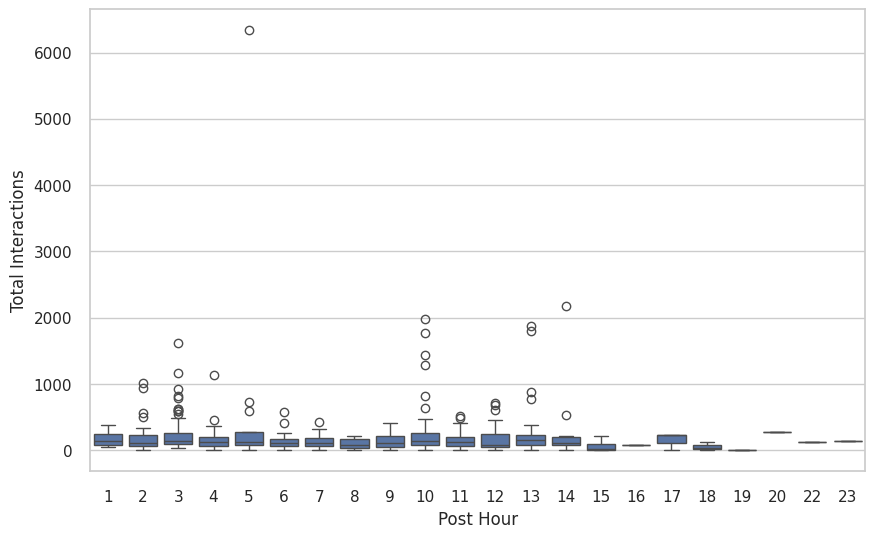

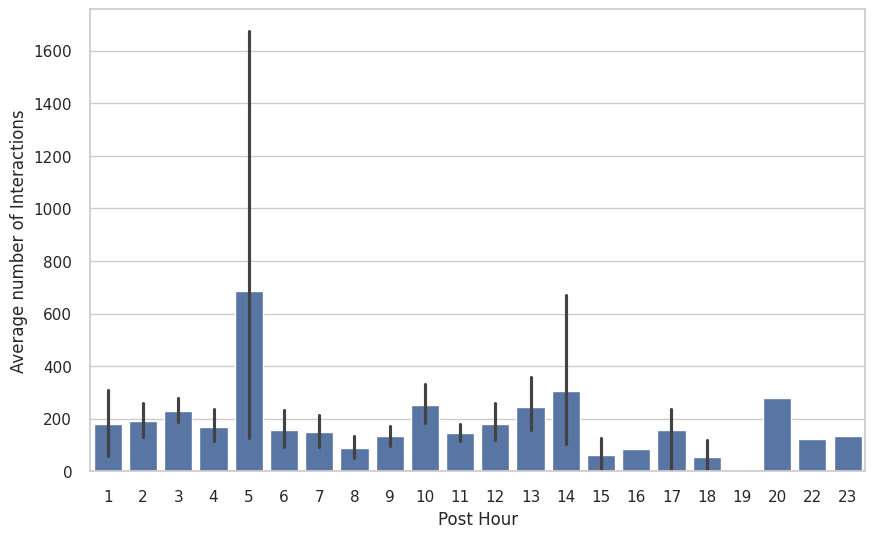

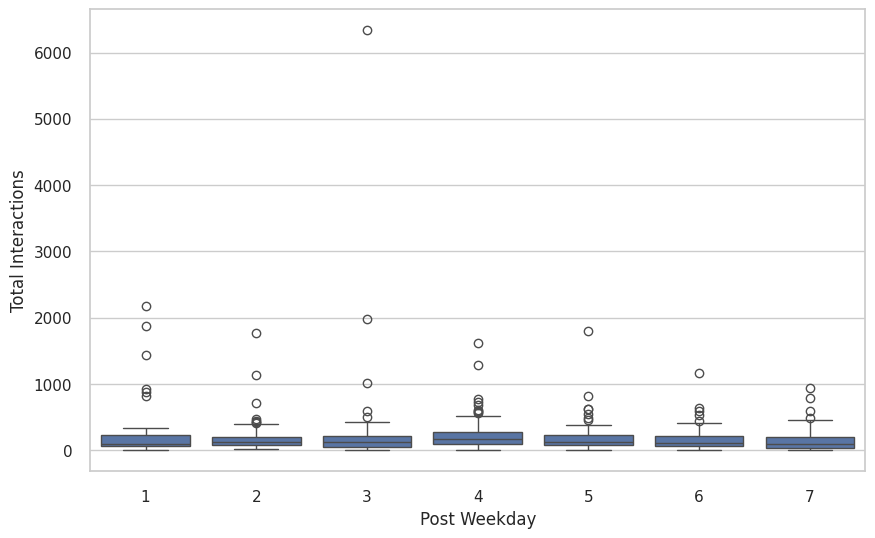

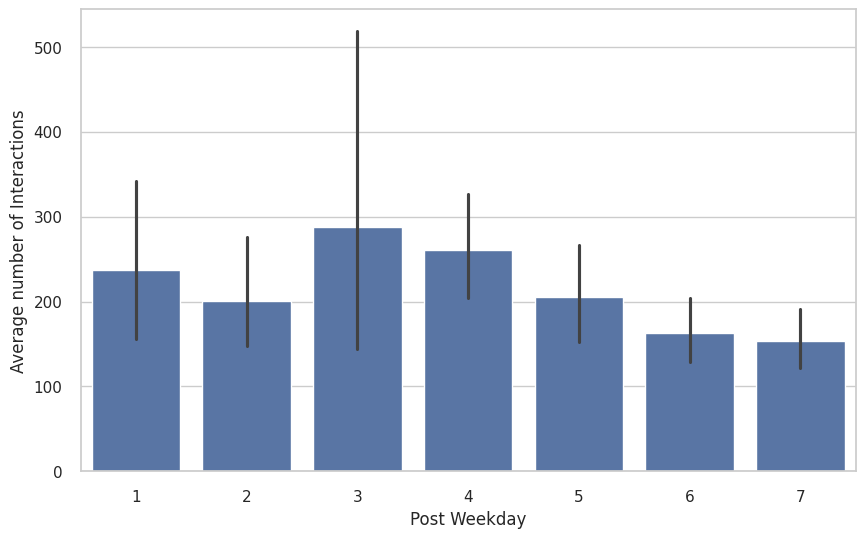

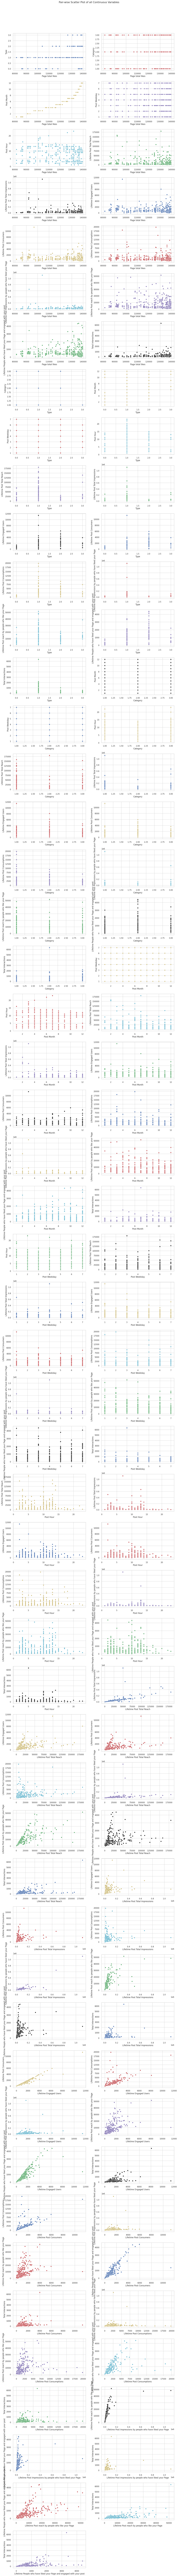

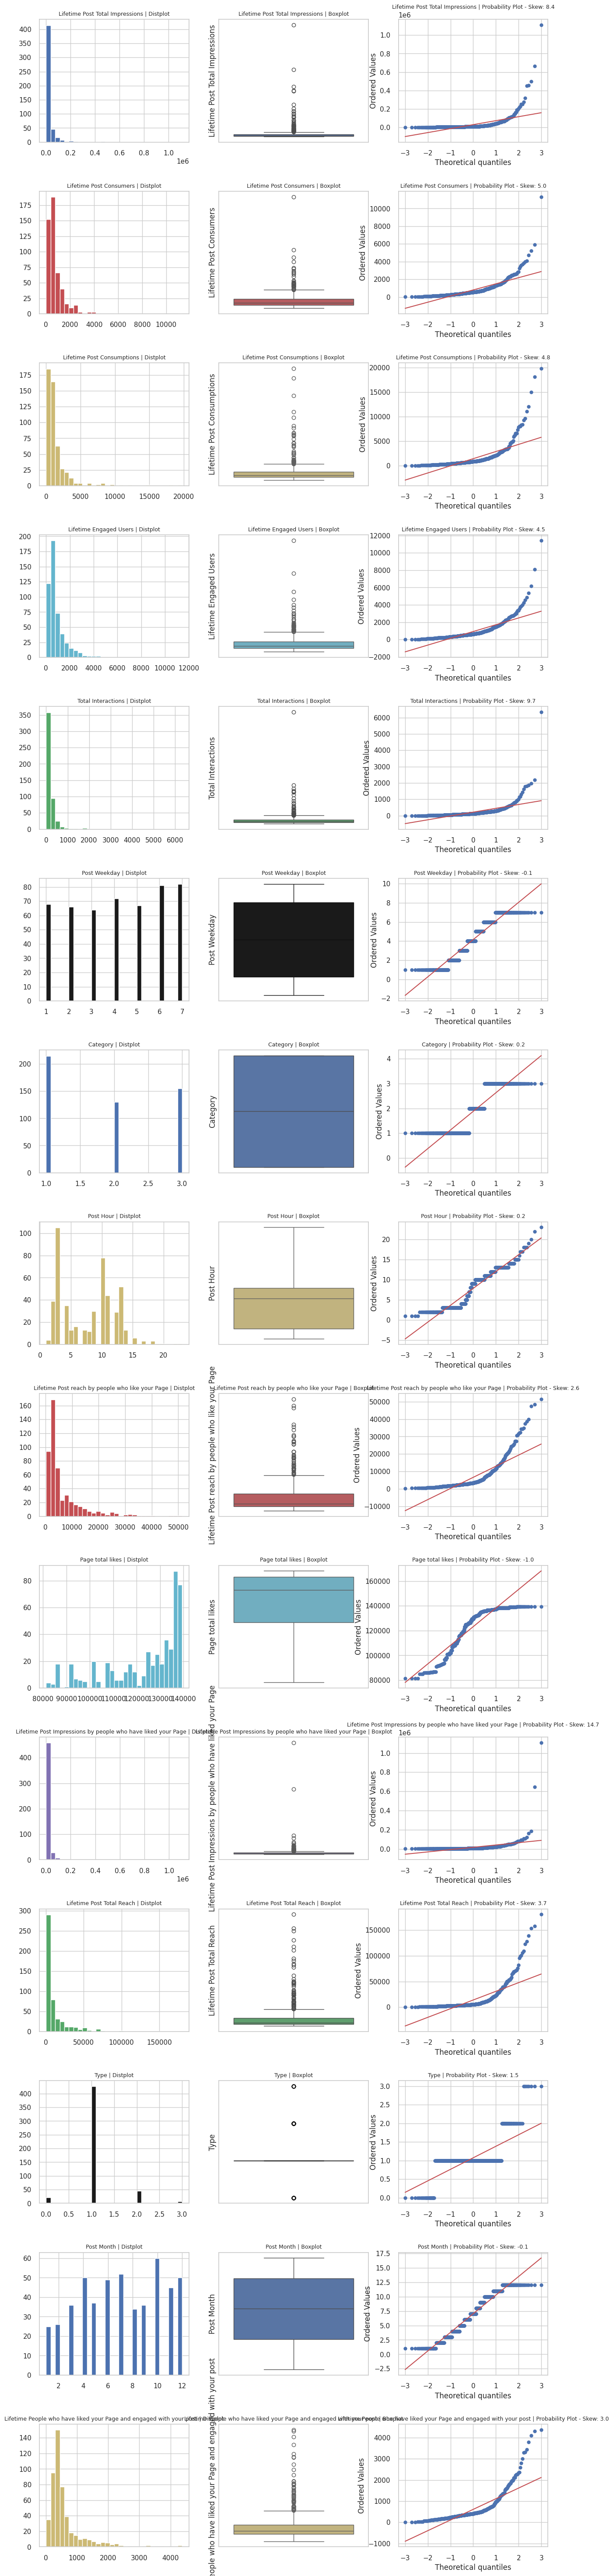

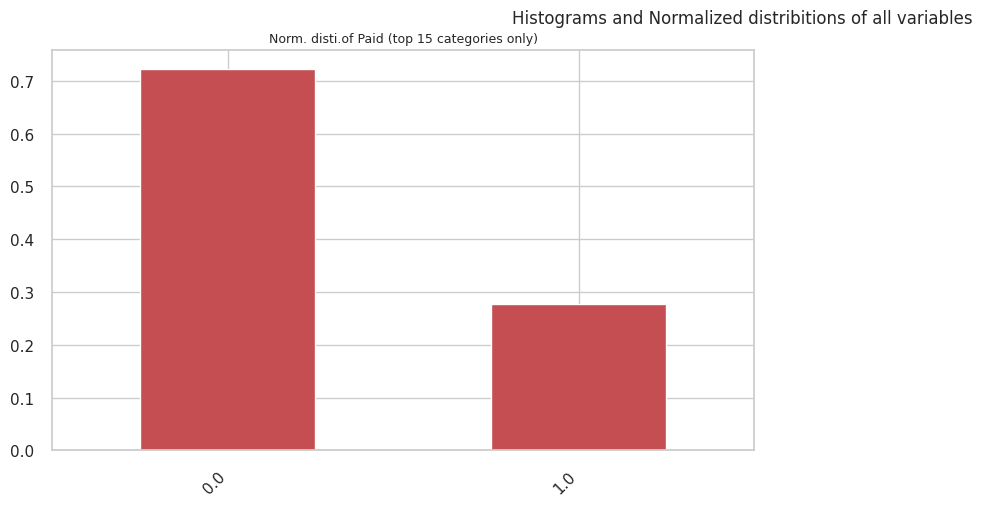

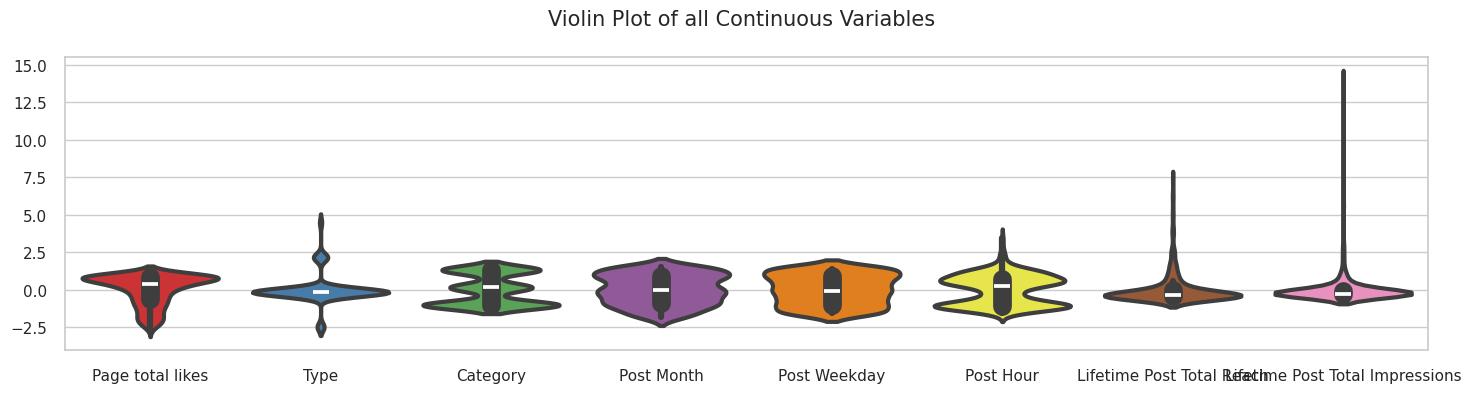

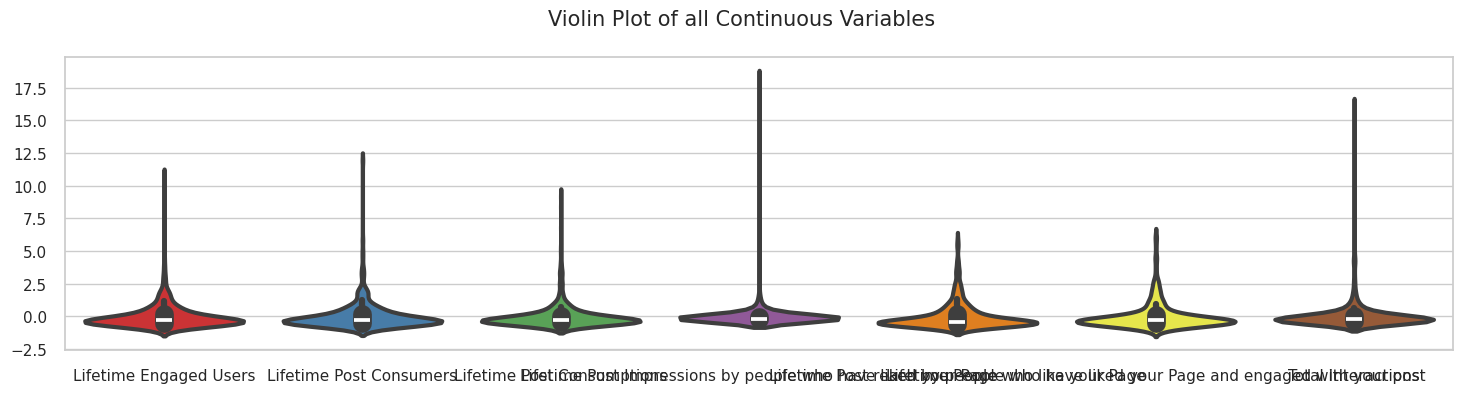

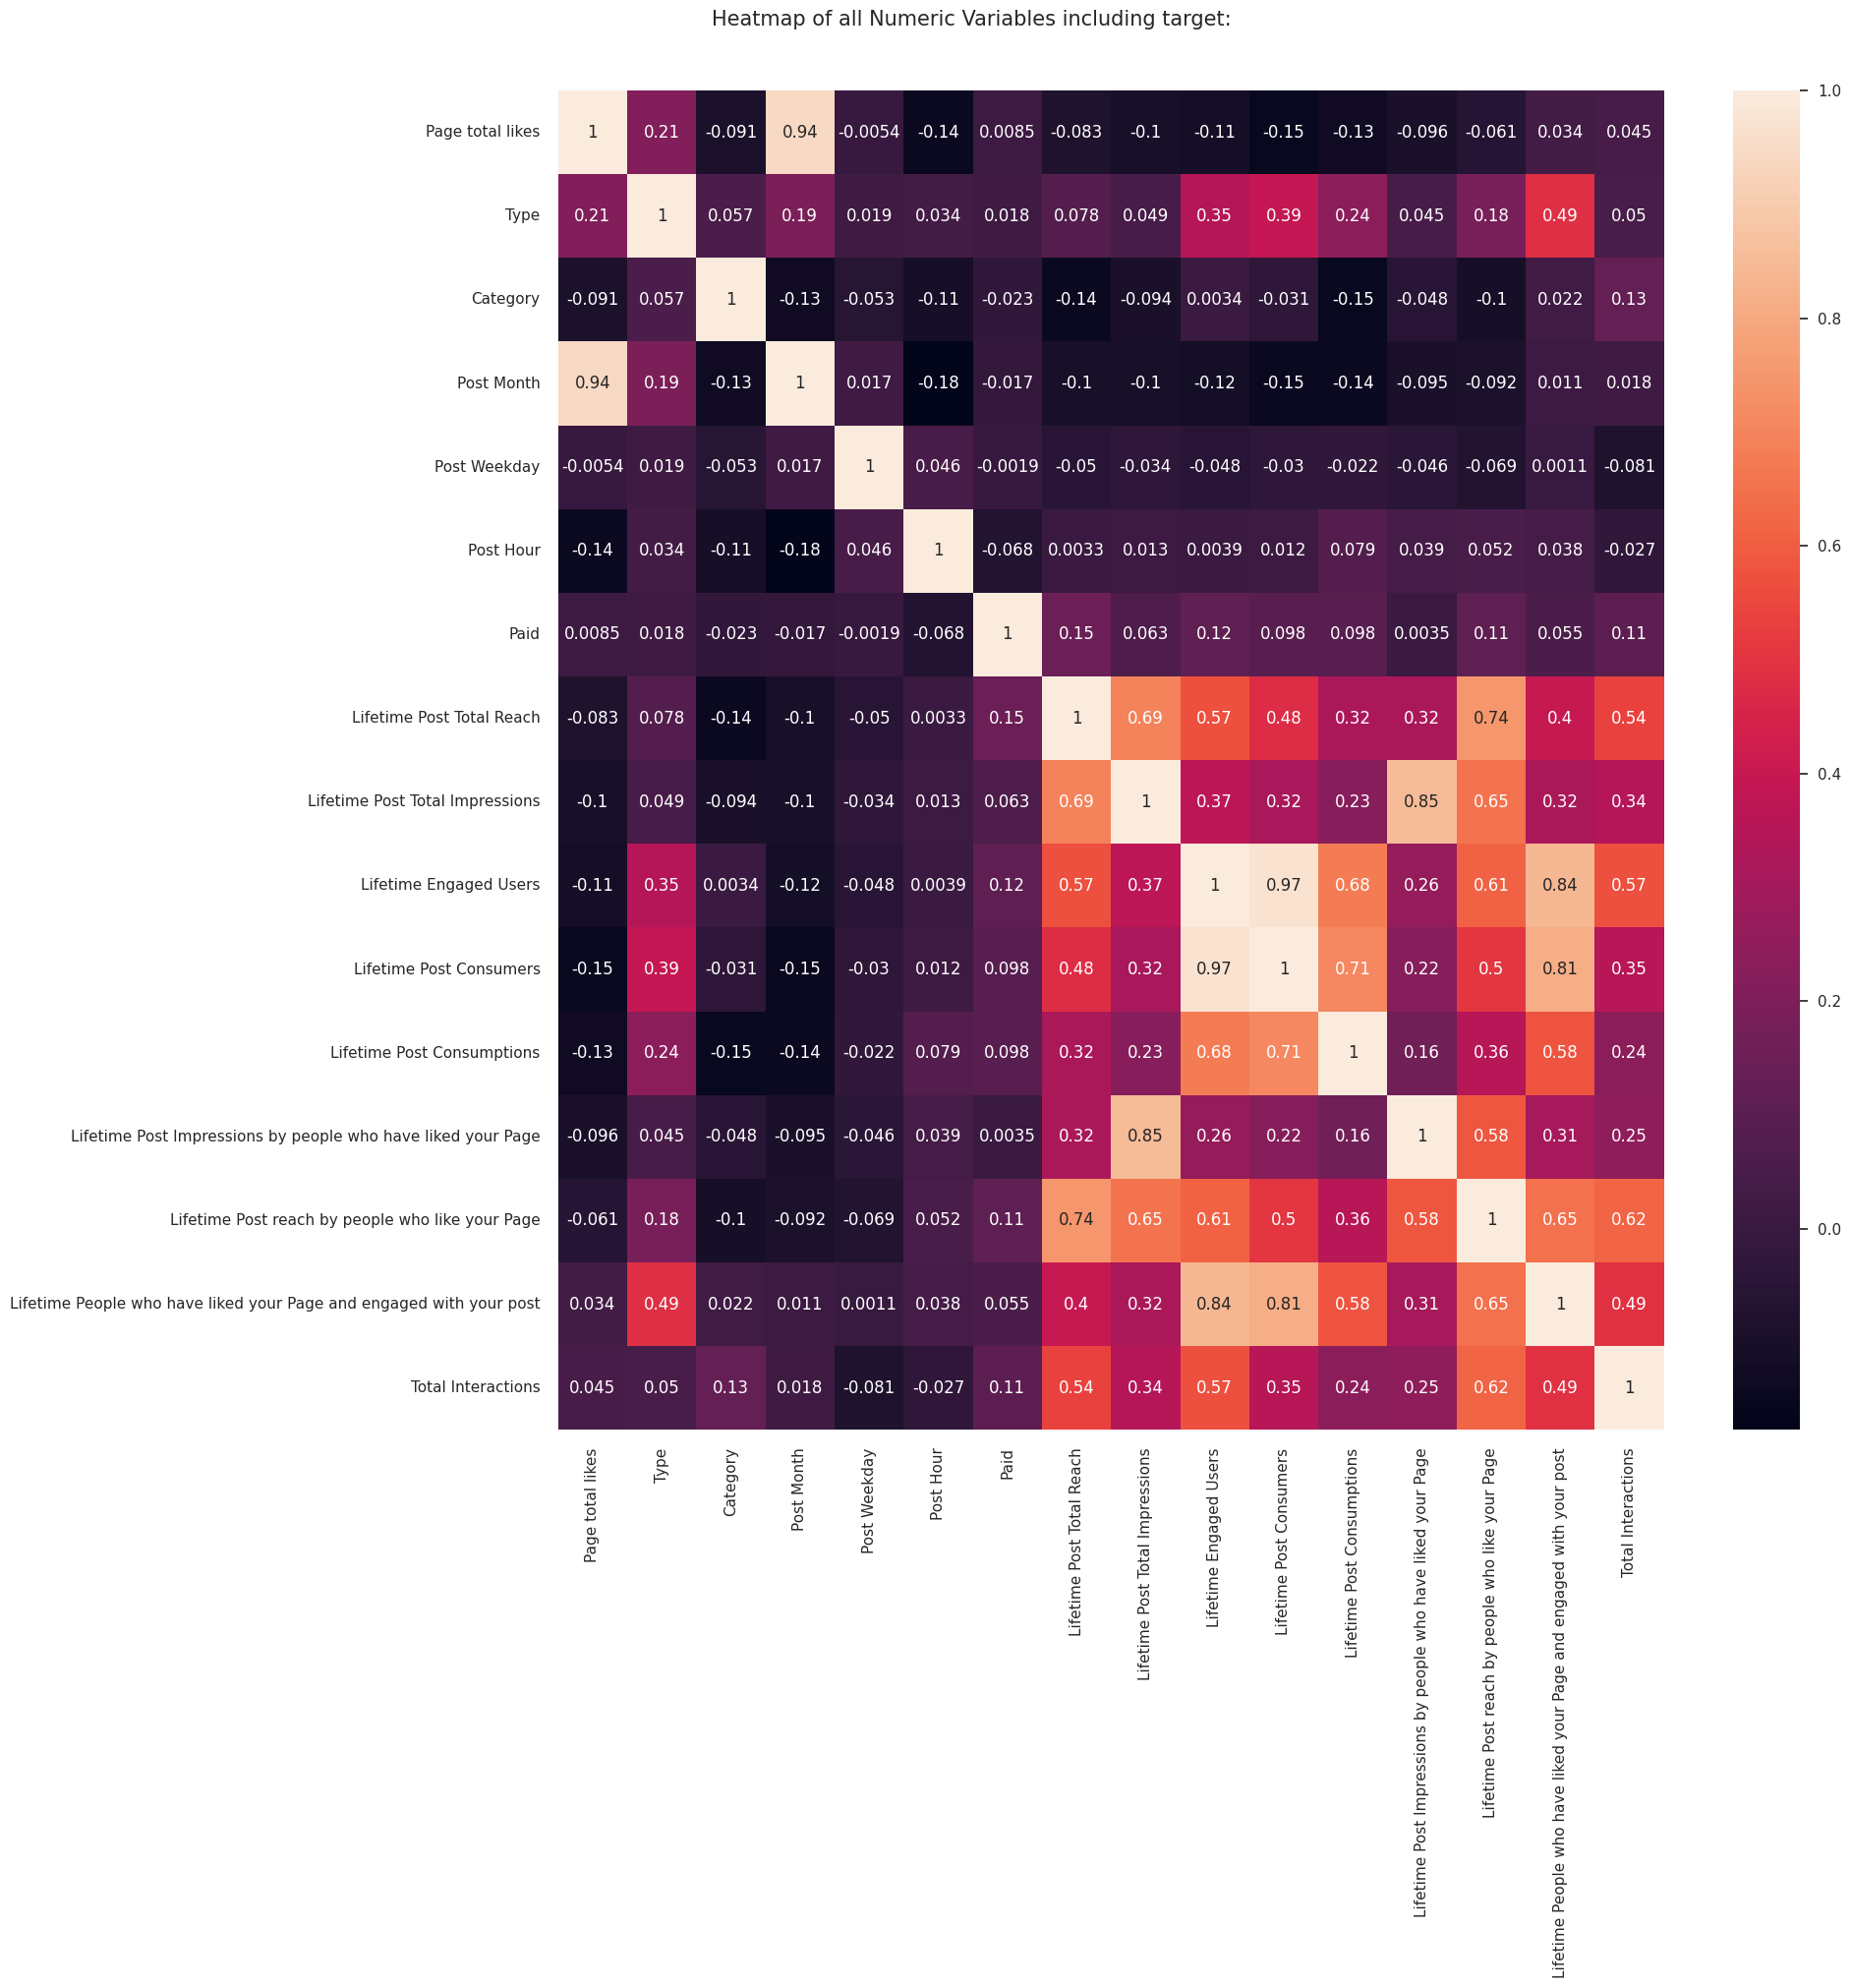

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 66 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [19]:
# Get some graphs!
# create an AutoViz class
AV = AutoViz_Class()
# create charts
%matplotlib inline
dftc = AV.AutoViz(filename='', sep ='', dfte = df, header = 0,
verbose = 1, lowess = False, chart_format ='png', max_rows_analyzed = 2000, max_cols_analyzed = 30)

In [20]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'Total Interactions'],
      dtype='object')

In [21]:
# Descriptive statistics
df.describe()

Page total likes     Type      Category   Post Month  Post Weekday  \
count       500.000000   500.000000  500.000000  500.000000   500.000000    
mean     123194.176000     1.074000    1.880000    7.038000     4.150000    
std       16272.813214     0.429993    0.852675    3.307936     2.030701    
min       81370.000000     0.000000    1.000000    1.000000     1.000000    
25%      112676.000000     1.000000    1.000000    4.000000     2.000000    
50%      129600.000000     1.000000    2.000000    7.000000     4.000000    
75%      136393.000000     1.000000    3.000000   10.000000     6.000000    
max      139441.000000     3.000000    3.000000   12.000000     7.000000    

        Post Hour     Paid     Lifetime Post Total Reach  \
count  500.000000  500.000000           500.00000          
mean     7.840000    0.278000         13903.36000          
std      4.368589    0.448462         22740.78789          
min      1.000000    0.000000           238.00000          
25%      3.000000    0.000000          3315.00000          
50%      9.000000    0.000000          5281.00000          
75%     11.000000    1.000000         13168.00000          
max     23.000000    1.000000        180480.00000          

       Lifetime Post Total Impressions  Lifetime Engaged Users  \
count           5.000000e+02                   500.000000        
mean            2.958595e+04                   920.344000        
std             7.680325e+04                   985.016636        
min             5.700000e+02                     9.000000        
25%             5.694750e+03                   393.750000        
50%             9.051000e+03                   625.500000        
75%             2.208550e+04                  1062.000000        
max             1.110282e+06                 11452.000000        

       Lifetime Post Consumers  Lifetime Post Consumptions  \
count         500.000000                 500.000000          
mean          798.772000                1415.130000          
std           882.505013                2000.594118          
min             9.000000                   9.000000          
25%           332.500000                 509.250000          
50%           551.500000                 851.000000          
75%           955.500000                1463.000000          
max         11328.000000               19779.000000          

       Lifetime Post Impressions by people who have liked your Page  \
count                          5.000000e+02                           
mean                           1.676638e+04                           
std                            5.979102e+04                           
min                            5.670000e+02                           
25%                            3.969750e+03                           
50%                            6.255500e+03                           
75%                            1.486050e+04                           
max                            1.107833e+06                           

       Lifetime Post reach by people who like your Page  \
count                      500.000000                     
mean                      6585.488000                     
std                       7682.009405                     
min                        236.000000                     
25%                       2181.500000                     
50%                       3417.000000                     
75%                       7989.000000                     
max                      51456.000000                     

       Lifetime People who have liked your Page and engaged with your post  \
count                               500.000000                               
mean                                609.986000                               
std                                 612.725618                               
min                                   9.000000                               
25%                                 291.000000          

In [22]:
# Split Predictors & Target
X = pd.DataFrame(df.drop(['Total Interactions'],axis=1))
y = pd.DataFrame(df['Total Interactions'])
y.columns = ['Total Interactions']
print('X:\n',X.head())
print('\ny\n',y.head())

X:
    Page total likes  Type  Category  Post Month  Post Weekday  Post Hour  \
0       139441         1       2         12            4           3       
1       139441         2       2         12            3          10       
2       139441         1       3         12            3           3       
3       139441         1       2         12            2          10       
4       139441         1       2         12            2           3       

   Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0   0.0             2752                          5091                
1   0.0            10460                         19057                
2   0.0             2413                          4373                
3   1.0            50128                         87991                
4   0.0             7244                         13594                

   Lifetime Engaged Users  Lifetime Post Consumers  \
0            178                     109             
1   

In [23]:
# Check skewness of target
y.skew(axis = 0, skipna = True)

Total Interactions    9.712906
dtype: float64

In [24]:
# Tukey Rule outliers for target (price/ping)
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# # Identify outliers
print('OUTLIERS:\n)')
col = 'Total Interactions'
outliers_Tukey = tukey_rule(y,col)
print("Column ",col,": ",outliers_Tukey)
X = X.drop(labels=outliers_Tukey, axis=0)
y = y.drop(labels=outliers_Tukey, axis=0)


OUTLIERS:
)
Column  Total Interactions :  [3, 14, 17, 26, 28, 67, 71, 75, 81, 101, 105, 116, 142, 143, 152, 167, 168, 176, 183, 191, 194, 199, 206, 214, 228, 240, 242, 244, 254, 264, 270, 272, 288, 323, 328, 346, 349, 370, 371, 379, 391, 442, 460, 476, 480]


<Axes: xlabel='Total Interactions'>

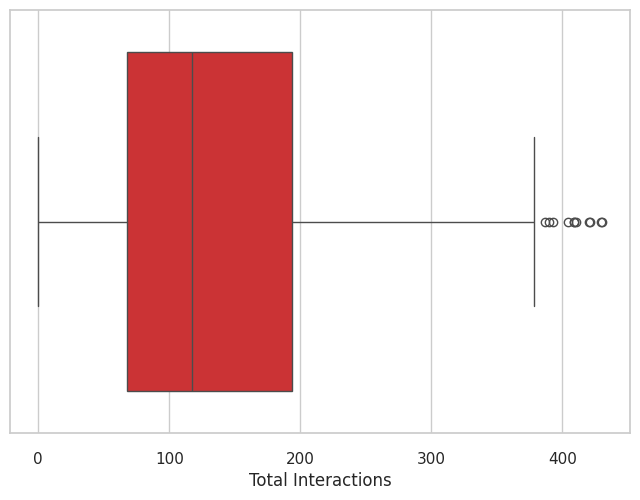

In [25]:
# Boxplot y to check outliers
sns.boxplot(x=y['Total Interactions'])

#**Holdout Sample & Scaling**

In [26]:
col_names = X.columns

In [27]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!

X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
print('Shape of X and y',X.shape, y.shape, '\nShape of training set X and y',X_train.shape, y_train.shape, '\nShape of test set X and y',X_test.shape, y_test.shape)


Shape of X and y (455, 15) (455, 1) 
Shape of training set X and y (364, 15) (364, 1) 
Shape of test set X and y (91, 15) (91, 1)


In [28]:
# Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc1 = StandardScaler()
X_train_std = stdsc1.fit_transform(X_train)
X_test_std = stdsc1.transform(X_test)
stdsc2 = StandardScaler()
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

#**Feature Importance**


<BarContainer object of 15 artists>

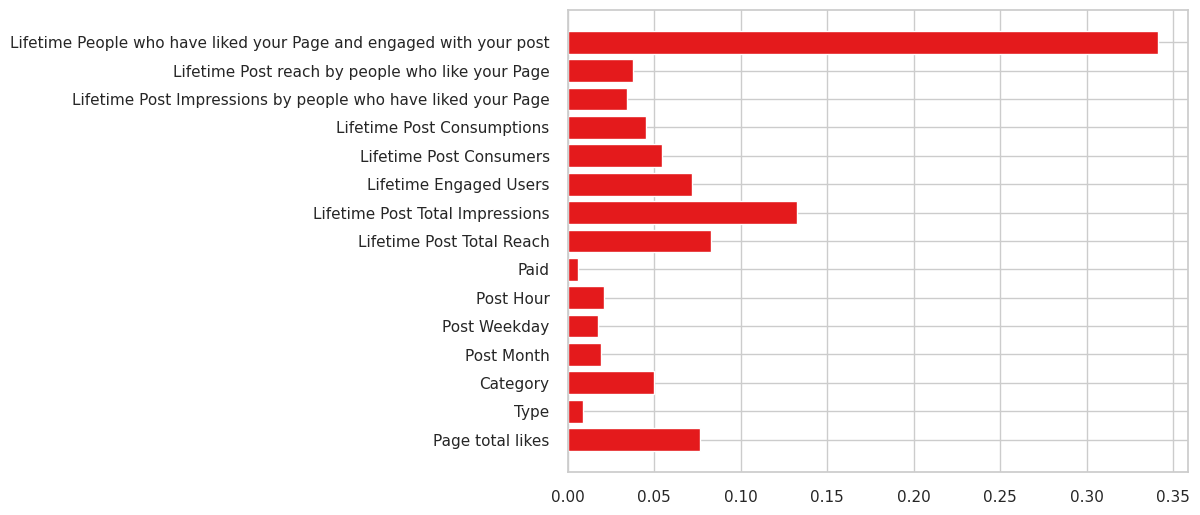

In [29]:
# Feature Importance
# Code adapted from this source: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# Let's try to weed out the really poor predictors
from matplotlib import pyplot                            # Import pyplot (to be able generate the barchart later in this snippet)
plt.rcParams["figure.figsize"] = (8,6)
model = RandomForestRegressor()                         # Create an instance of a RandomForestClassifier
# fit the model
model.fit(X_train_std, y_train_std)                  # Fit the RandomForest instance using the traiing data
# get importance
importance = model.feature_importances_                  # The RandomForestClassifier instance computes feature importance as a bonus. Store them imprtance values in importance'.
# summarize feature importance
plt.barh(col_names, model.feature_importances_)

# Hackathon starts here!

In [30]:
# Report performance
def Performance(actuals,predictions):
  print('MSE: %.2f ' % mean_squared_error(actuals, predictions))
  print('MAE: %.2f ' % mean_absolute_error(actuals,predictions))
  print('R^2: %.2f' % r2_score(actuals, predictions))

# Plotting the actuals vs predictions
def PredsVsActuals(actuals,predictions):
  plt.plot(actuals, predictions, '.', color='blue')
  plt.xlabel('Actuals')
  plt.ylabel('Predictions')
  plt.show()

# Regressor Models

REGRESSOR:  Multiple Linear Regression 

Coefficients: 
 [ 6.81863923e-02  3.82828489e-02  5.71672782e-02 -2.22694868e-01
  7.80013339e-03 -2.05067323e-02  1.95256060e-03 -1.93830778e-01
  2.56889191e-01  1.40241862e+01 -1.38317820e+01  1.17988449e-01
 -2.46892598e-01  1.00875106e-02  1.40090649e-01]
MSE: 1177.07 
MAE: 23.11 
R^2: 0.85


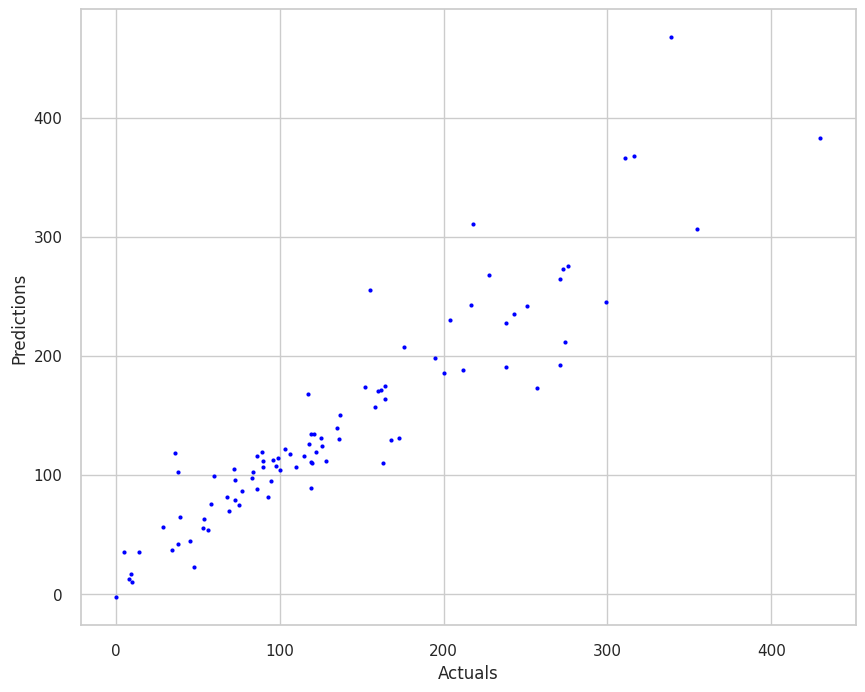

Maximum error:  597.1586665011304 %


REGRESSOR:  Lasso Regression 

Coefficients: 
 [-0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
MSE: 8076.91 
MAE: 71.92 
R^2: -0.00


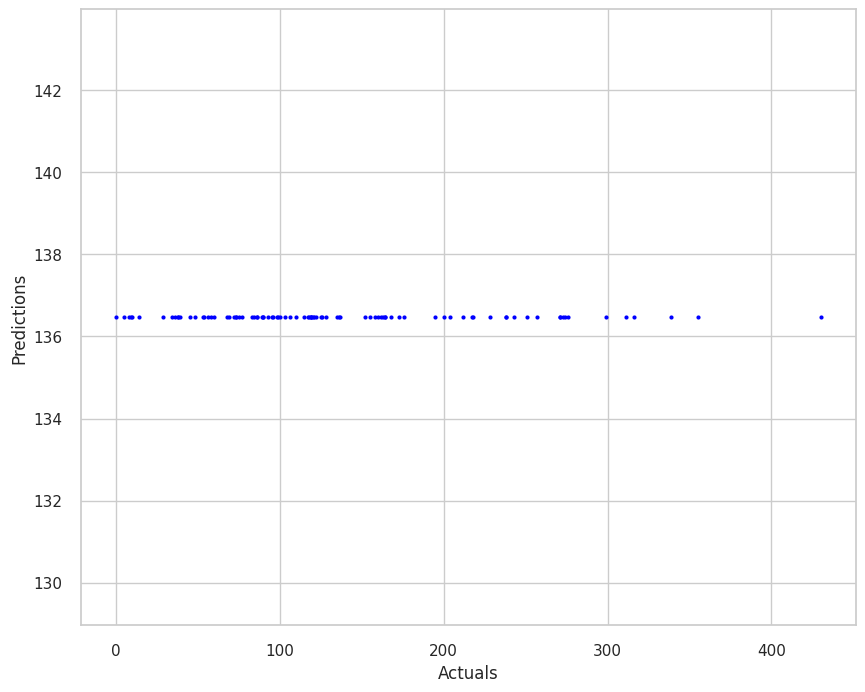

Maximum error:  inf %


REGRESSOR:  Ridge Regression 

Coefficients: 
 [ 0.02230597 -0.03444239  0.20986783 -0.042565   -0.00863717 -0.01720231
  0.01395821 -0.09018475  0.16654804  6.96888499 -6.81531957  0.04722054
 -0.2084883   0.2064671   0.1707115 ]
MSE: 2156.44 
MAE: 35.56 
R^2: 0.73


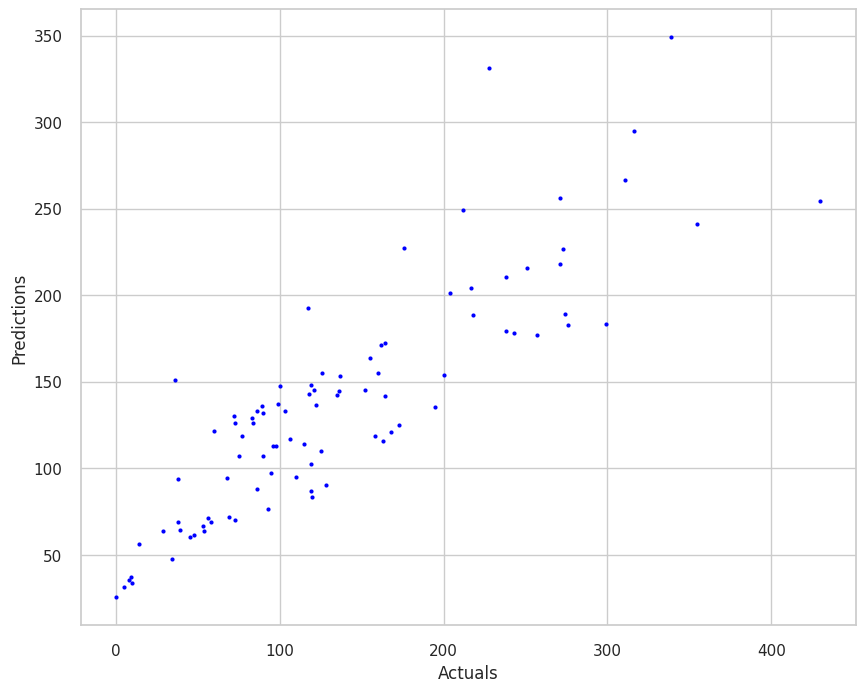

Maximum error:  inf %


REGRESSOR:  ElasticNet Regression 

Coefficients: 
 [ 0.          0.          0.14988851  0.         -0.         -0.
  0.          0.02130376  0.          0.08560655  0.          0.
  0.          0.16667259  0.11880084]
MSE: 6326.06 
MAE: 62.41 
R^2: 0.22


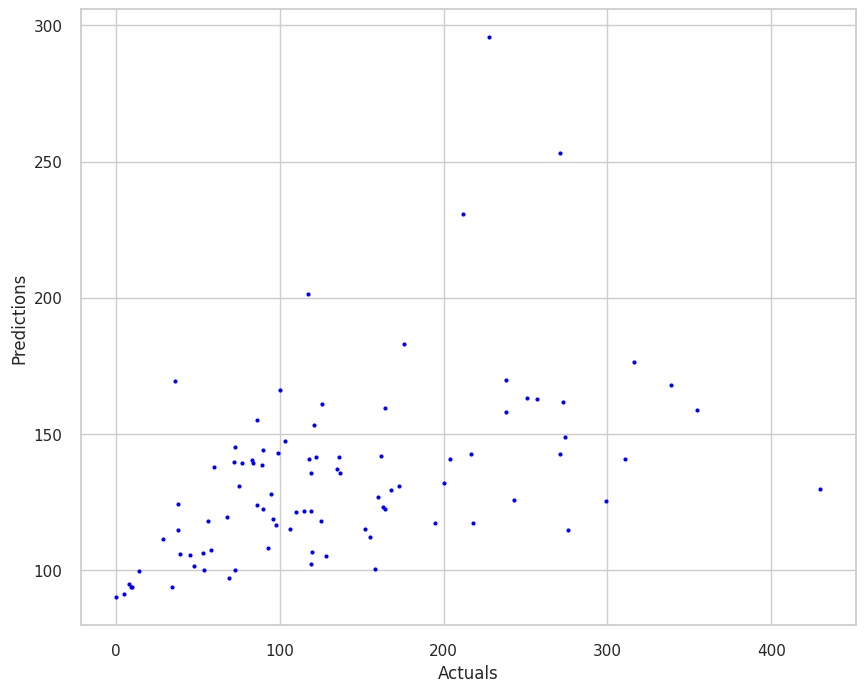

Maximum error:  inf %


REGRESSOR:  kNN 

MSE: 5238.59 
MAE: 53.46 
R^2: 0.35


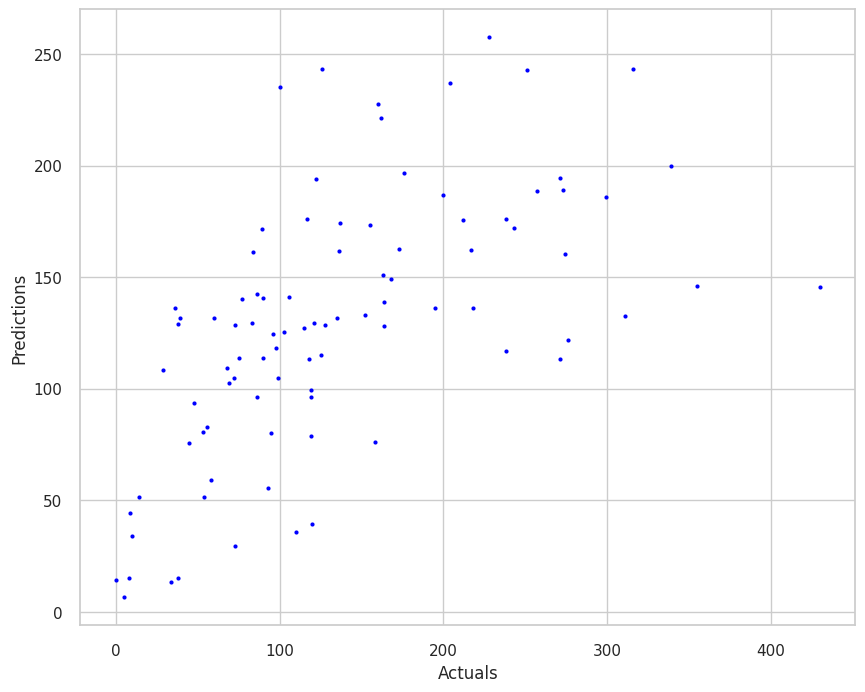

Maximum error:  inf %


REGRESSOR:  SVR 

MSE: 34500.28 
MAE: 82.39 
R^2: -3.27


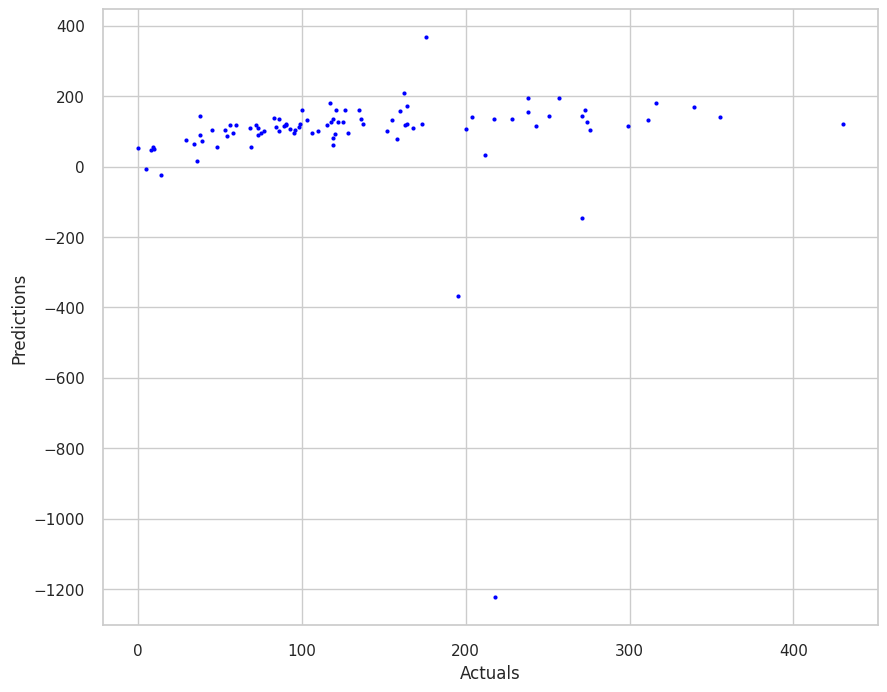

Maximum error:  inf %


REGRESSOR:  Decision Tree 

MSE: 5704.56 
MAE: 54.32 
R^2: 0.29


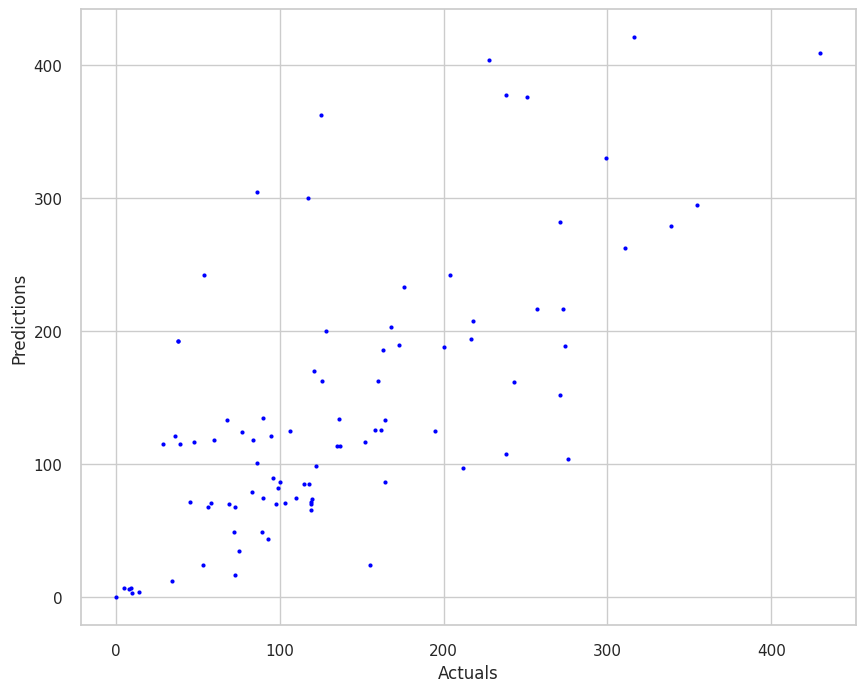

Maximum error:  407.8947368421052 %


REGRESSOR:  Multilayer Perceptron 

MSE: 3507.00 
MAE: 42.98 
R^2: 0.57


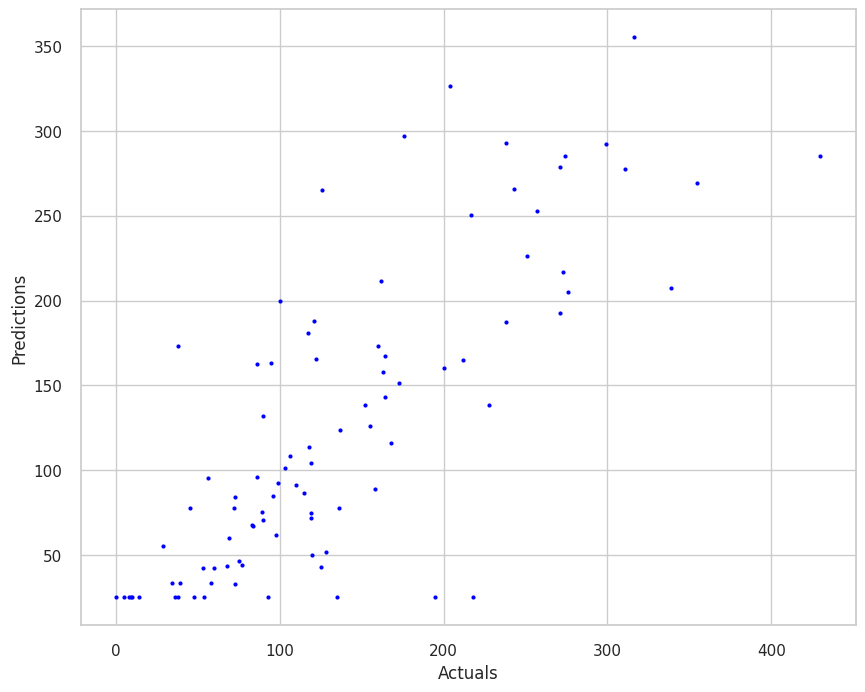

Maximum error:  inf %




In [31]:
# Loop through base learners
names = ['Multiple Linear Regression', 'Ridge Regression','ElasticNet Regression','kNN', 'SVR','Decision Tree','Multilayer Perceptron']
regressors = [linear_model.LinearRegression(),
              Lasso(alpha=0.5),
              Ridge(alpha=0.5),
              ElasticNet(alpha=0.25, l1_ratio=0.5),
              KNeighborsRegressor(n_neighbors=5),
              SVR(kernel = 'poly'),   #Can try kernels 'poly', 'linear' and 'sigmoid' kernels
              DecisionTreeRegressor(),
              MLPRegressor(hidden_layer_sizes=(150,150,1),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')]

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(X_train_std, np.ravel(y_train_std))
  # Make predictions
  y_pred_std = regr.predict(X_test_std)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
  if name in ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression']:
      print('Coefficients: \n', regr.coef_)
  # Performance
  plt.figure(figsize=(10,8))
  Performance(y_test,y_pred)
  PredsVsActuals(y_test,y_pred)
  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred)
  results = pd.concat([y_pred, y_test.set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')

# Deep Learning Regressor Models

REGRESSOR:  Random Forest 

MSE: 2146.21 
MAE: 34.14 
R^2: 0.73


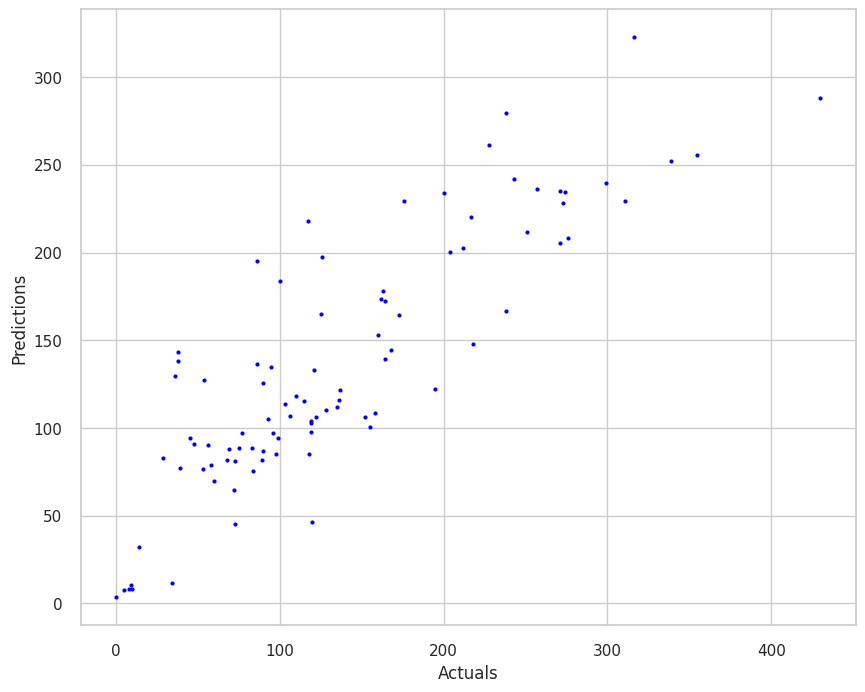

Maximum error:  inf %


REGRESSOR:  XGBoost 

MSE: 2401.01 
MAE: 34.01 
R^2: 0.70


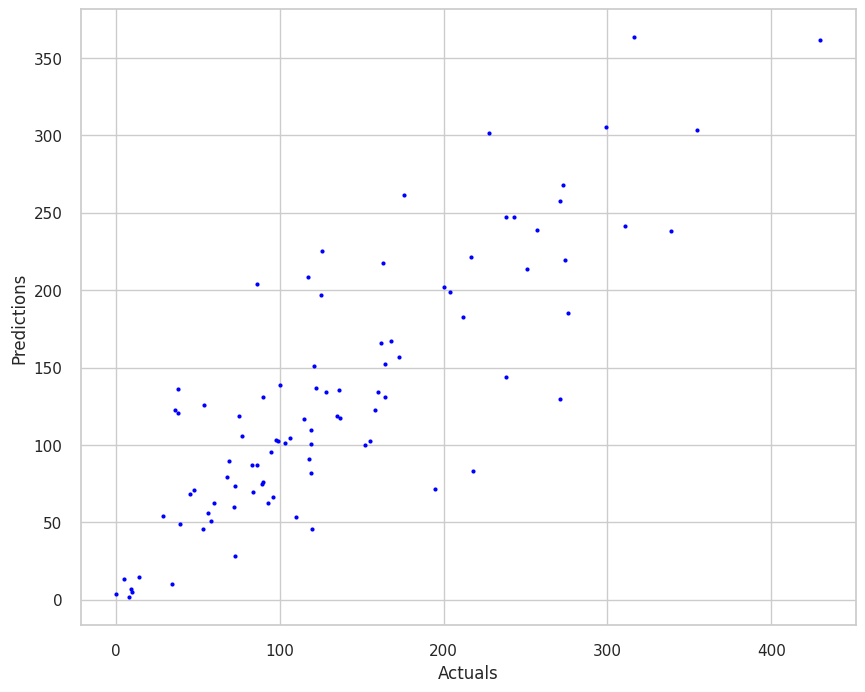

Maximum error:  inf %


REGRESSOR:  AdaBoost 

MSE: 3327.93 
MAE: 44.75 
R^2: 0.59


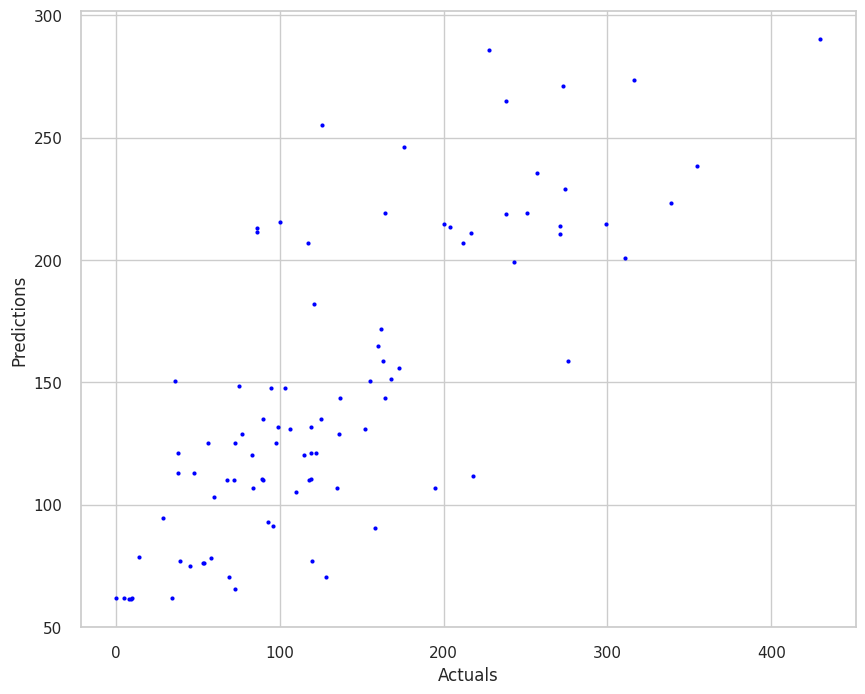

Maximum error:  inf %


REGRESSOR:  Stacked Ensemble 

MSE: 1075.88 
MAE: 22.77 
R^2: 0.87


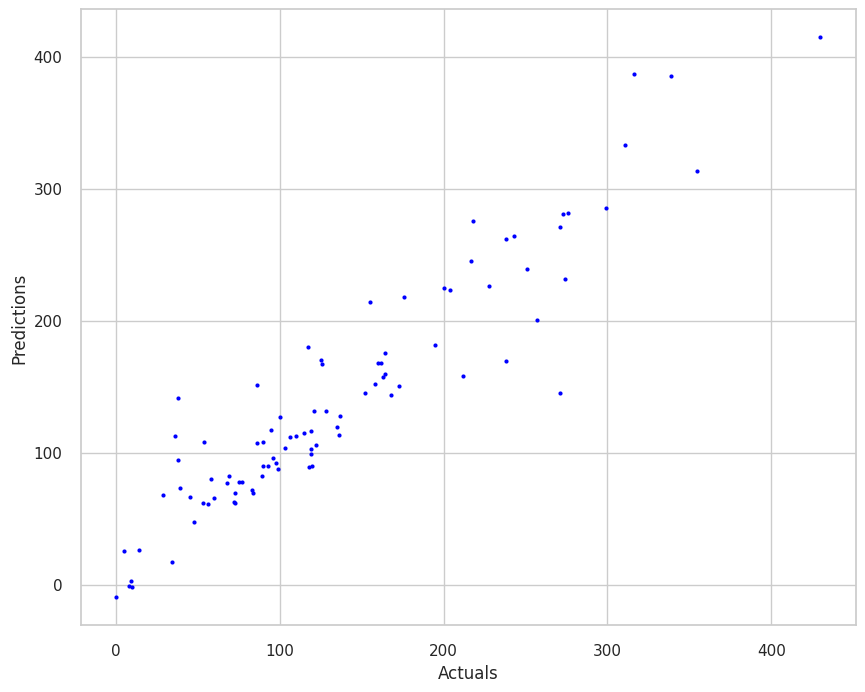

Maximum error:  412.980087785306 %




In [35]:
# Loop through ensembles and deep learning model
names = ['Random Forest', 'XGBoost', 'AdaBoost','Stacked Ensemble']
regressors = [RandomForestRegressor(),
              XGBRegressor(objective ='reg:squarederror'),
              AdaBoostRegressor(),
              get_stacking()
              ]

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(X_train_std, np.ravel(y_train_std))
  # Make predictions
  y_pred_std = regr.predict(X_test_std)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
  # Performance
  plt.figure(figsize=(10,8))
  Performance(y_test,y_pred)
  PredsVsActuals(y_test,y_pred)
  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred)
  y_test = pd.DataFrame(y_test)
  results = pd.concat([y_pred, y_test.set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')

# Learning Curves

In [36]:
# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('MLR', linear_model.LinearRegression()))
  level0.append(('Ridge', Ridge(alpha=0.5)))
  level0.append(('RF', RandomForestRegressor()))
  level0.append(('XGB', XGBRegressor(objective ='reg:squarederror')))
  # define meta learner model
  level1 = linear_model.LinearRegression()
  # define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
  return model

# get a list of models to evaluate
def get_models():
  models = dict()
  models['Multiple Linear Regression'] = linear_model.LinearRegression()
  models['Ridge Regression'] = Ridge(alpha=0.5)
  models['Random Forest'] = RandomForestRegressor()
  models['XGBoost'] = XGBRegressor(objective ='reg:squarederror')
  models['Stacked Ensemble'] = get_stacking()
  return models

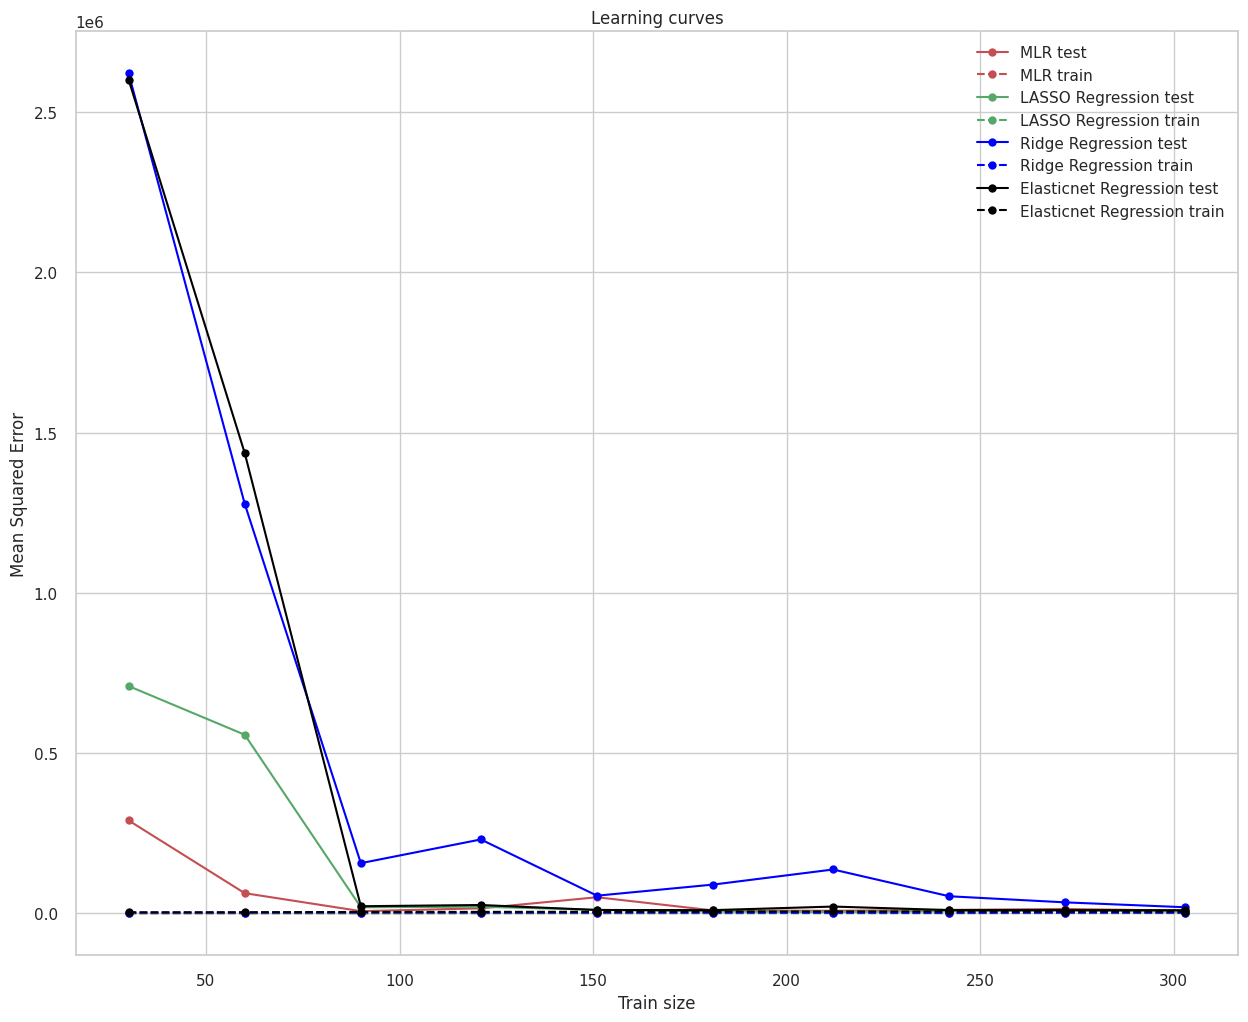

<Figure size 1600x1200 with 0 Axes>

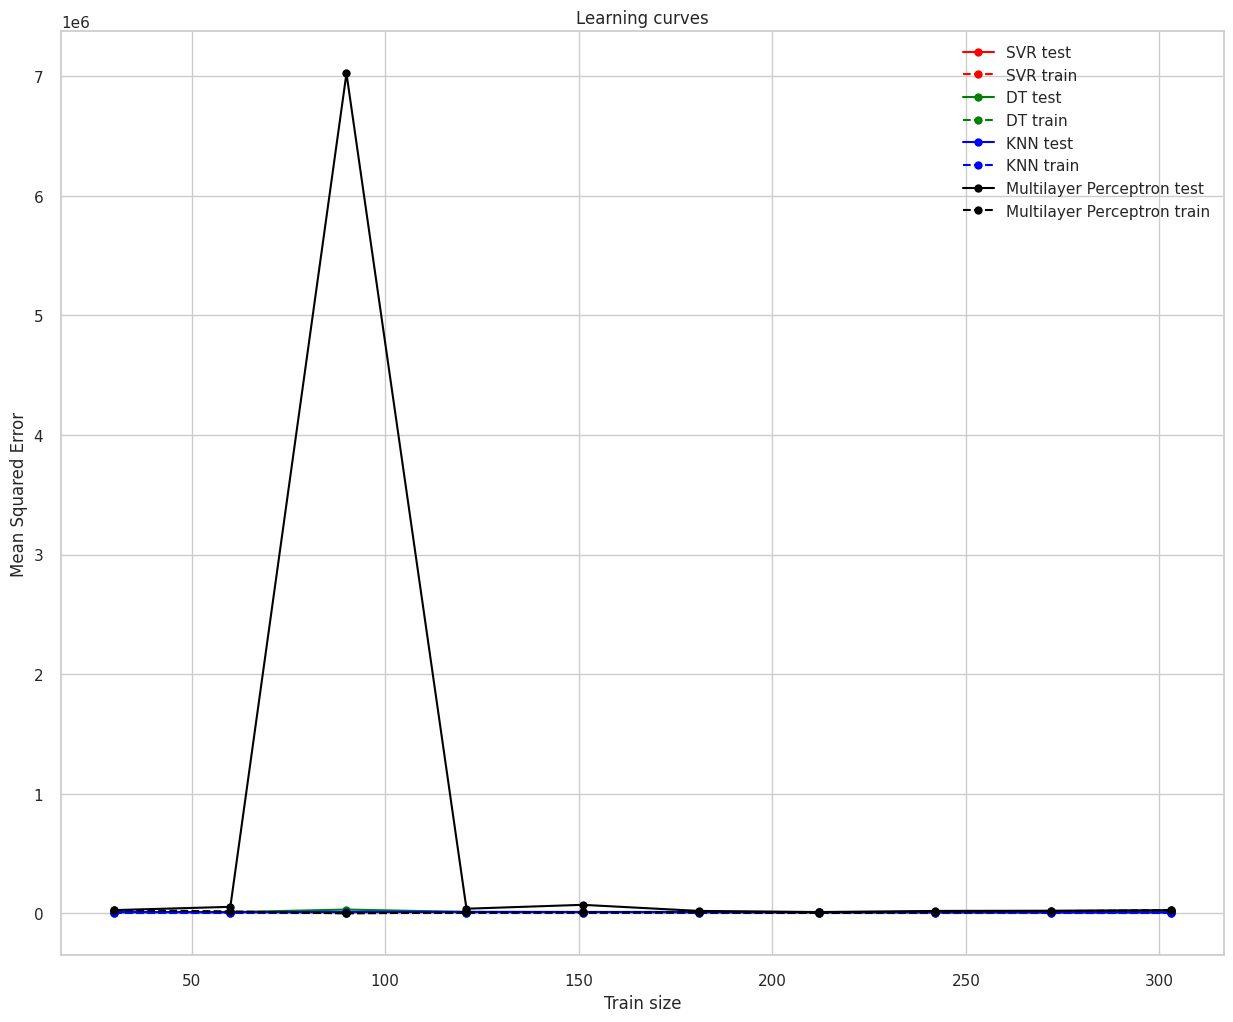

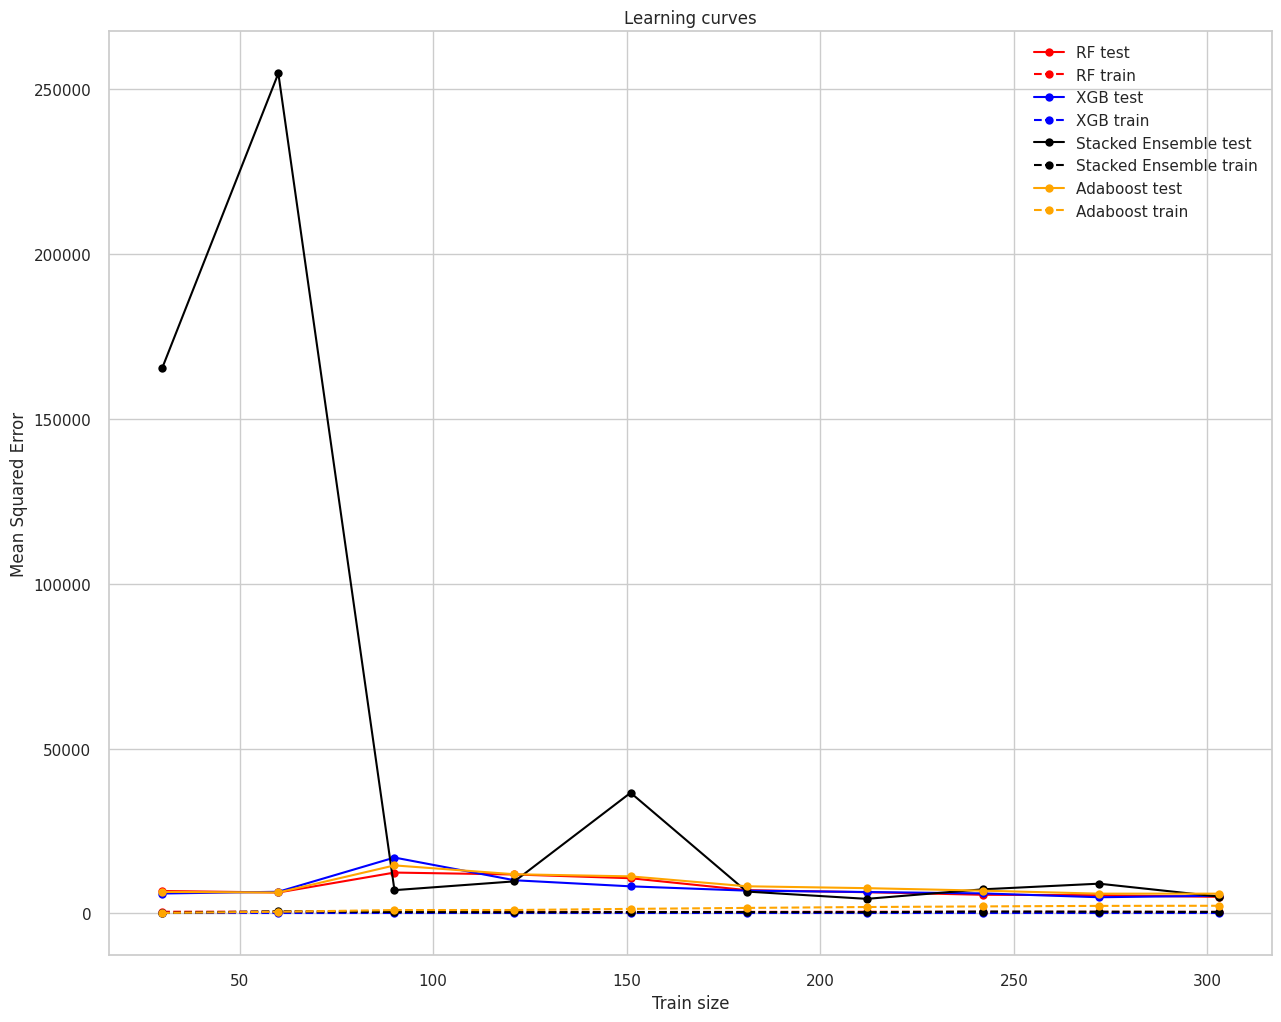

In [40]:
from sklearn.svm import SVR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import ShuffleSplit
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

train_size = 0.2 * len(X)

MLR = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', linear_model.LinearRegression()]])

lasso = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor',Lasso(alpha=0.5)]])

ridge = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', Ridge(alpha=0.5)]])

elasticnet = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', ElasticNet(alpha=0.25, l1_ratio=0.5)]])

MLP = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', MLPRegressor(hidden_layer_sizes=(150,150,1), max_iter = 1000,activation = 'relu', solver = 'adam')]])

kNN = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', KNeighborsRegressor(n_neighbors=5)]])

dt = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', DecisionTreeRegressor()]])

svr = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', SVR()]])

XGB = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', XGBRegressor(objective ='reg:squarederror')]])

RF = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', RandomForestRegressor()]])

adaboost = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor',AdaBoostRegressor()]])

stacked_ensemble = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['regressor', get_stacking()]])


# Visualize learning curves

plt.rcParams["figure.figsize"] = (15,12)
plt.figure()

train_sizes, train_scores_MLR, test_scores_MLR = learning_curve(
    MLR,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_lasso, test_scores_lasso = learning_curve(
    lasso,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_ridge, test_scores_ridge = learning_curve(
    ridge,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_elasticnet, test_scores_elasticnet = learning_curve(
    elasticnet,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)

plt.plot(train_sizes, -test_scores_MLR.mean(1), "o-", color="r", label="MLR test")
plt.plot(train_sizes, -train_scores_MLR.mean(1), "o--", color="r", label="MLR train")
plt.plot(train_sizes, -test_scores_lasso.mean(1), "o-", color="g", label="LASSO Regression test")
plt.plot(train_sizes, -train_scores_lasso.mean(1), "o--", color="g", label="LASSO Regression train")
plt.plot(train_sizes, -test_scores_ridge.mean(1), "o-", color="blue", label="Ridge Regression test")
plt.plot(train_sizes, -train_scores_ridge.mean(1), "o--", color="blue", label="Ridge Regression train")
plt.plot(train_sizes, -test_scores_elasticnet.mean(1), "o-", color="black", label="Elasticnet Regression test")
plt.plot(train_sizes, -train_scores_elasticnet.mean(1), "o--", color="black", label="Elasticnet Regression train")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")
figure(figsize=(20, 15), dpi=80)
plt.show()

train_sizes, train_scores_svr, test_scores_svr = learning_curve(
    svr,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_dt, test_scores_dt = learning_curve(
    dt,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_kNN, test_scores_kNN = learning_curve(
    kNN,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_MLP, test_scores_MLP = learning_curve(
    MLP,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)

plt.plot(train_sizes, -test_scores_svr.mean(1), "o-", color="red", label="SVR test")
plt.plot(train_sizes, -train_scores_svr.mean(1), "o--", color="red", label="SVR train")
plt.plot(train_sizes, -test_scores_dt.mean(1), "o-", color="green", label="DT test")
plt.plot(train_sizes, -train_scores_dt.mean(1), "o--", color="green", label="DT train")
plt.plot(train_sizes, -test_scores_kNN.mean(1), "o-", color="blue", label="KNN test")
plt.plot(train_sizes, -train_scores_kNN.mean(1), "o--", color="blue", label="KNN train")
plt.plot(train_sizes, -test_scores_MLP.mean(1), "o-", color="black", label="Multilayer Perceptron test")
plt.plot(train_sizes, -train_scores_MLP.mean(1), "o--", color="black", label="Multilayer Perceptron train")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()


train_sizes, train_scores_RF, test_scores_RF = learning_curve(
    RF,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_XGB, test_scores_XGB = learning_curve(
    XGB,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)

train_sizes_abs, train_scores_adaboost, test_scores_adaboost = learning_curve(
    adaboost,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
train_sizes_abs, train_scores_stacked_ensemble, test_scores_stacked_ensemble = learning_curve(
    stacked_ensemble,
    X,
    np.ravel(y),
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=3,
)
plt.plot(train_sizes, -test_scores_RF.mean(1), "o-", color="red", label="RF test")
plt.plot(train_sizes, -train_scores_RF.mean(1), "o--", color="red", label="RF train")
plt.plot(train_sizes, -test_scores_XGB.mean(1), "o-", color="blue", label="XGB test")
plt.plot(train_sizes, -train_scores_XGB.mean(1), "o--", color="blue", label="XGB train")
plt.plot(train_sizes, -test_scores_stacked_ensemble.mean(1), "o-", color="black", label="Stacked Ensemble test")
plt.plot(train_sizes, -train_scores_stacked_ensemble.mean(1), "o--", color="black", label="Stacked Ensemble train")
plt.plot(train_sizes, -test_scores_adaboost.mean(1), "o-", color="orange", label="Adaboost test")
plt.plot(train_sizes, -train_scores_adaboost.mean(1), "o--", color="orange", label="Adaboost train")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()

# Conclusions

**Overall Results**\
We looked at MSE, MAE, and R-squared to conduct an analysis of each model. Based on the metrics below, it shows that the overall best model the Stacked Ensemble model with an R-squared of 87%. The multiple linear regression model also does very well with an R-squared of 85%. These two models accurately predict the total number of interactions including likes, shares, and comments.

The lasso regression and SVR models do horribly. Lasso has an R-squared of -0 and the SVR Model has a R-squared of -3.27.

**Results for Each Model**

Multiple Linear Regression \
MSE: 1177.07\
MAE: 23.11\
R-squared: 0.85

Lasso Regression \
MSE: 8076.91\
MAE: 71.92\
R-squared: -0.00

Ridge Regression\
MSE: 2156.44 \
MAE: 35.56 \
R^2: 0.73

ElasticNet Regression\
MSE: 6326.06 \
MAE: 62.41 \
R^2: 0.22

KNN Regression \
MSE: 5238.59 \
MAE: 53.46 \
R^2: 0.35

SVR Regression \
MSE: 34500.28 \
MAE: 82.39 \
R^2: -3.27

Decision Tree\
MSE: 5704.56 \
MAE: 54.32 \
R^2: 0.29

Multilayer Perceptron \
MSE: 3507.00 \
MAE: 42.98 \
R^2: 0.57

Random Forest \
MSE: 2146.21 \
MAE: 34.14 \
R^2: 0.73

XGBoost \
MSE: 2401.01 \
MAE: 34.01 \
R^2: 0.70

AdaBoost\
MSE: 3327.93 \
MAE: 44.75 \
R^2: 0.59

Stacked Ensemble\
MSE: 1075.88\
MAE: 22.77 \
R^2: 0.87
